In [1]:
# importing all library required
import pandas as pd #for reading data 
import numpy as np # for useful numpy oprations
import nltk # for getting stopwords 
from sklearn.utils import shuffle # for shuffling dataset
import string
from nltk.corpus import stopwords
import collections # for counting the words
stop_words = set(stopwords.words('english')) 
from sklearn.metrics import confusion_matrix # for plotting confusion matrix
import seaborn as sn # for plotting confusion matrix
from matplotlib import pyplot as plt# for plotting confusion matrix# for plotting confusion matrix
from wordcloud import WordCloud # for making wordcloud

In [2]:
#reading data and droping unnecessary columns
data = pd.read_csv("spam.csv" , encoding='latin-1') # read data
data = shuffle(data) #shuffle data
data = data.drop_duplicates() # delete duplicate rows
data = data.drop(["Unnamed: 2"] , axis=1)
data = data.drop(["Unnamed: 3"] , axis=1)
data = data.drop(["Unnamed: 4"] , axis=1)

In [3]:
#renaming message and label coloumns
data.rename({"v1":"label"}, axis="columns", inplace=True)
data.rename({"v2":"msg"}, axis="columns", inplace=True)

In [4]:
# converting all to lower case and splitting traing and testing data
data = data.apply(lambda x: x.astype(str).str.lower()) # convert all words in data to lower case
train = data.iloc[: int(.7 *len(data)) , :] # train data
test = data.iloc[int(.7 *len(data)): , :] # test data
Spam = train.query('label == "spam"') # spam messages
Spam = Spam.drop(["label"] , axis = 1) 
Ham = train.query('label == "ham"') # ham messages
Ham = Ham.drop(["label"] , axis = 1)
Ham = Ham.values
Spam = Spam.values

In [5]:
#making BOW of words for both the classes
def make_dictionary(Z):
    mega = []
    for w in Z:
        a = w[0].translate(str.maketrans('', '', string.punctuation)) #removing punctutaions from the given text
        words = nltk.word_tokenize(a) # tokenize test messages
        words = [w1 for w1 in words if w1 not in stop_words]
        mega = np.hstack([mega , words])
    return mega
res1 = make_dictionary(Ham)
ham_BOW = collections.Counter(res1) #making dictionary
res2 = make_dictionary(Spam)
spam_BOW = collections.Counter(res2)
spam_BOW = dict(spam_BOW)
ham_BOW = dict(ham_BOW)

In [6]:
spamcount = 0
hamcount = 0
for i in (spam_BOW.values()): # counting number of words
    spamcount += i
for i in (ham_BOW.values()):
    hamcount += i
    
spamcount, hamcount

(7773, 25852)

In [7]:
p_spam = len(Spam)/ (len(Spam) + len(Ham)) #spam probability
p_ham = len(Ham) / (len(Spam) + len(Ham)) # ham probability
p_ham , p_spam
test = test.values

In [8]:
#testing the model on testing data
correct = 0
incorrect = 0
expected = []
predicted = []
for i in test:
    a = i[1].translate(str.maketrans('', '', string.punctuation)) #removing punctuations from messages
    words = nltk.word_tokenize(a) # tokenize test messages
    words = [w1 for w1 in words if w1 not in stop_words]
    p1 = 1# tokenize test messages
    for w in words:   #find probability of message being spam
        value = spam_BOW.get(w , 0)
        p1 *= (value + 1)/(spamcount + len(spam_BOW))
    p1 *= p_spam
    p2 = 1
    for w in words:   #find probabilty of messages being ham
        value = ham_BOW.get(w , 0)
        p2 *= (value + 1)/(hamcount + len(ham_BOW))
    p2 *= p_ham
    if(p1 > p2): # comparing probabilities
        res = 1
        predicted.append(1)
    else:
        res = 0
        predicted.append(0)
    if(res == 1 and i[0] == "spam"):
        correct += 1
    elif(res == 0 and i[0] == "ham"):
        correct += 1
    else:
        incorrect += 1
    if(i[0] == "spam"):
        expected.append(1)
    else:
        expected.append(0)

In [9]:
accuracy = correct / (incorrect + correct) # calculating accuracy 

In [10]:
print("accuracy is :" , accuracy*100 , "%")

accuracy is : 93.61702127659575 %


In [11]:
results = confusion_matrix(expected, predicted) # get confusion matrix

In [12]:
print(results)

[[1267   98]
 [   1  185]]


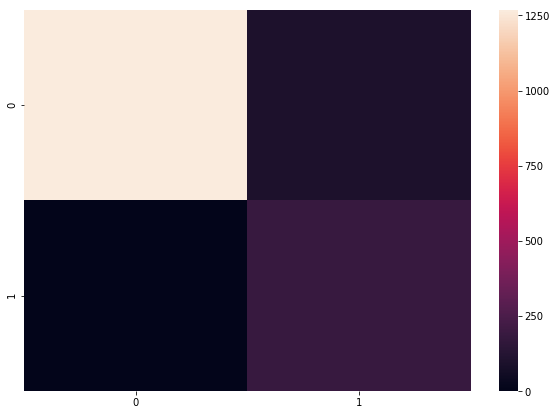

In [13]:
plt.figure(figsize = (10,7))  # plot conofusion matrix
sn.heatmap(results)

In [14]:
unique_string1 = (" ").join(res1)
unique_string2 = (" ").join(res2)
wordcloud1 = WordCloud(width = 1000, height = 500).generate(unique_string1)
wordcloud2 = WordCloud(width = 1000, height = 500).generate(unique_string2)

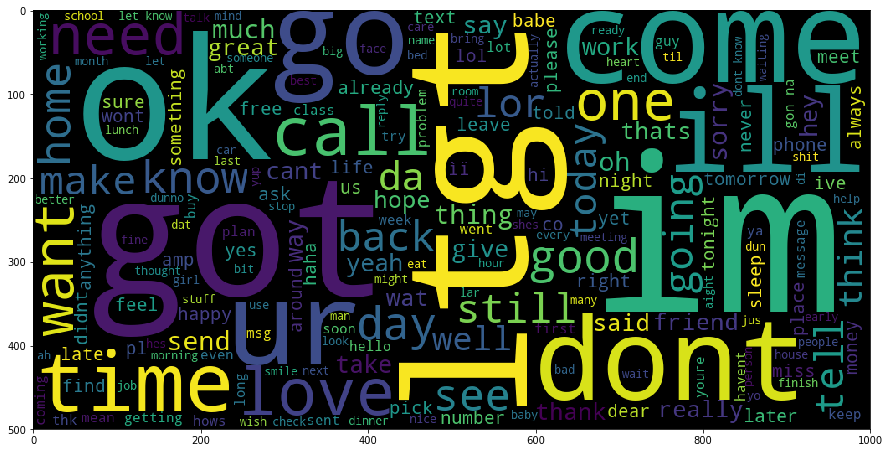

In [15]:
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud1) 

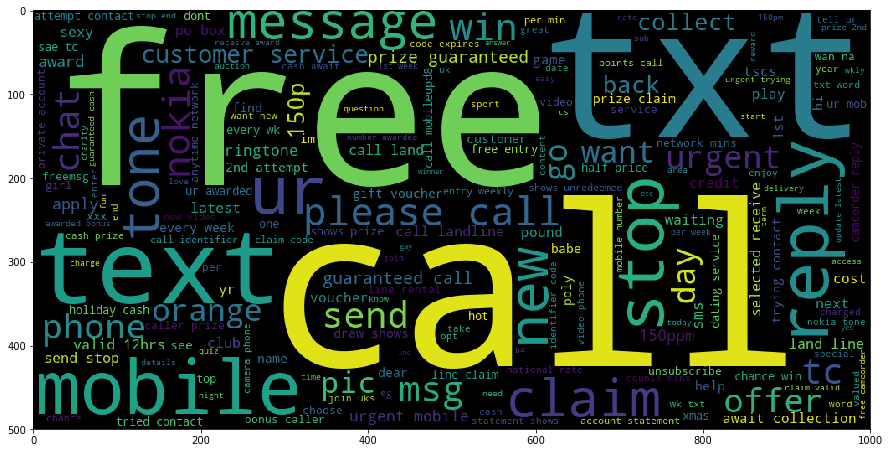

In [16]:
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud2) 

In [17]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r